In [4]:
pip install textblob==0.17.1

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install seaborn

In [6]:
pip install nltk==3.6.7

Note: you may need to restart the kernel to use updated packages.


In [7]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter, defaultdict
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mainframe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mainframe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mainframe/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [9]:
myfile = open('20th_century_article_Wiki.txt', encoding='utf-8')

In [10]:
# Import txt file

with open('20th_century_article_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [11]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914–1918)1.1.2Russian Revolution and communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939–1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11Th

In [12]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2Russian', 'Revolution', 'and', 'communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'dictators

In [13]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4787 samples and 20894 outcomes>


In [14]:
dist_words.most_common(10)

[('.', 1277),
 ('the', 1106),
 (',', 963),
 ('of', 615),
 ('and', 401),
 ('to', 326),
 ('[', 300),
 (']', 300),
 ('in', 295),
 ('The', 292)]

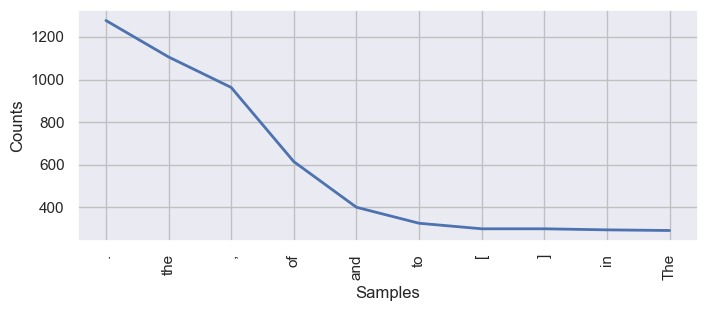

In [15]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Stop words

In [17]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'once', 'with', 'if', 'has', 'can', 't', 'shouldn', 'both', 'did', "i'm", 'more', 'haven', 'their', "wasn't", 'don', 'not', "they'll", 'theirs', "haven't", 'm', 'same', 'her', "i've", 'were', 'such', "needn't", 'y', 'yours', "i'd", 'under', "weren't", 'few', "he's", 'ma', 'is', 'aren', 'below', 're', "you'll", 'of', 'isn', 'only', "should've", "you're", 'needn', 'have', 'whom', 'above', 'its', "she'd", 'd', 'was', "you'd", 'these', 'up', "we'd", "shan't", "that'll", 'to', "didn't", 'against', 'no', 'so', 'wouldn', 'ours', "shouldn't", 'where', 'does', 'over', 'nor', "he'll", "we're", 'are', 'which', 'had', "we've", 'doing', 'should', 'they', "it'll", 's', 'him', 'from', "i'll", "mightn't", 'how', "it'd", 'further', "they'd", 'those', "it's", 'itself', 'having', 'his', 'but', 'doesn', 'most', 'why', 'been', 'into', 'you', 'on', 'there', 'do', "they've", 'weren', "hadn't", "hasn't", 'some', 'during', 've', 'shan', 'themselves', 'out', 'being', 'will', 'in', 'very', "mustn't", "she's", '

In [18]:
# Removing stopwords in sentences

# filtered_sent = []
# for word in tokenized_sent:
#     if word not in stop_words:
#         filtered_sent.append(word)
# print("Tokenized Sentence:", tokenized_sent)
# print("Filterd Sentence:", filtered_sent)

In [19]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [20]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceDonateCreate',
 'accountLog',
 'inPersonal',
 'toolsDonate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1World',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.1.2Russian',
 'Revolution',
 'communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '1939–1945',


In [21]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4683 samples and 16204 outcomes>


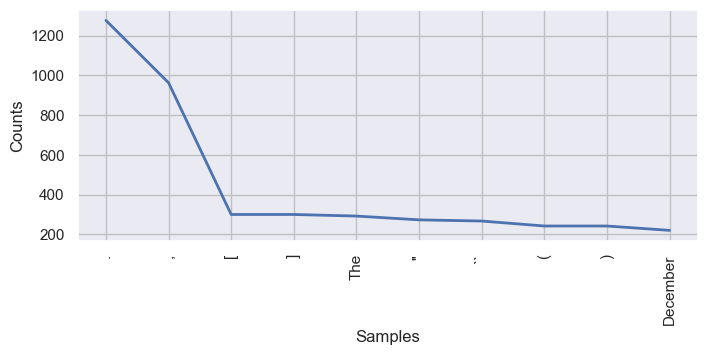

In [22]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [23]:
dist_words_filter

FreqDist({'.': 1277, ',': 963, '[': 300, ']': 300, 'The': 292, "''": 273, '``': 267, '(': 242, ')': 242, 'December': 220, ...})

In [24]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [25]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchAppearanceDonateCreate    accountLog    inPersonal    toolsDonate    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   World    beginning    century               The    war    end    wars               World    War    I                                Russian    Revolution    communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                The    war    Europe     Blitzkrieg     Operation    Barbarossa

In [26]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Ja

In [27]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

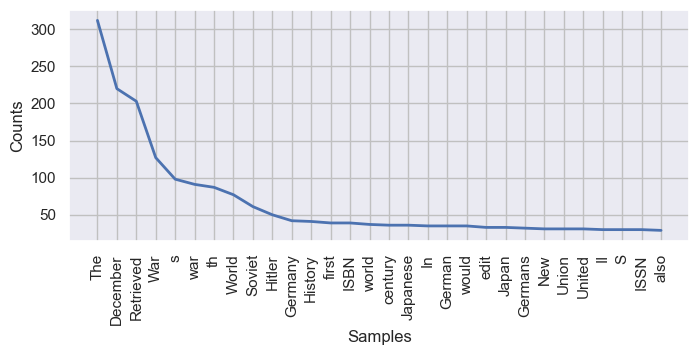

In [28]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

##### We can see that apparently a lot of things happened during the month of December during the 20th century. War was the major theme. Anyone with any historical knowledge can see that words Soviet, Hitler, German(y), and Japanese, were mostly associated with world wars 1 and 2. The Soviet Union was also formed and fell during the 20th century, so that's probably why it was so heavily mentioned.

In [30]:
dist_words_filter_2.most_common(20)

[('The', 312),
 ('December', 220),
 ('Retrieved', 203),
 ('War', 127),
 ('s', 98),
 ('war', 91),
 ('th', 87),
 ('World', 77),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 42),
 ('History', 41),
 ('first', 39),
 ('ISBN', 39),
 ('world', 37),
 ('century', 36),
 ('Japanese', 36),
 ('In', 35),
 ('German', 35),
 ('would', 35)]

## POS tags with textblob

In [32]:
new_stopwords = ["would", "ISBN", 'In', 'th', 's', 'The']

In [33]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [34]:
%%time
text = TextBlob(str(filtered))

CPU times: user 14.5 ms, sys: 1.81 ms, total: 16.3 ms
Wall time: 19.9 ms


In [35]:
text

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'centuryToggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'off

In [36]:
tags_list = text.tags

In [37]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchAppearanceDonateCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'toolsDonate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 ("'learn", 'NNP'),
 ("'", 

In [38]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [39]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [40]:
df_t = df_text.groupby('Word type').count().reset_index()

In [41]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,76
2,DT,11
3,EX,12
4,FW,43


In [42]:
top10 = df_t.nlargest(10, 'Words')

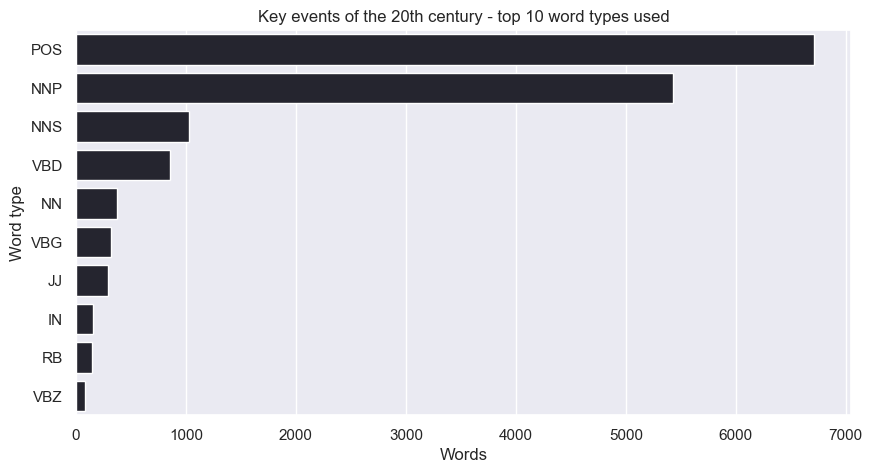

In [43]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("Key events of the 20th century - top 10 word types used")

In [44]:
# def word_analysis(word_type):
#     filtered = [row for row in my_list if str(word_type) in row[1]]
#     print("filtered for " + word_type)
#     df = pd.DataFrame(filtered)
#     df.columns = ["Word", "Occurences"]
#     x=df.groupby('Word').count().reset_index()
#     y=x.sort_values(by=['Occurences'], ascending=False)
#     top10=y.nlargest(10, 'Occurences')
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Key events of the 20th century - most frequently used "+ word_type +" type word")

## Nouns

In [46]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_nouns = y.nlargest(15, 'Occurences')

In [47]:
top15_nouns

,Word,Occurences
289,'December,220
1252,'War,127
2585,'war,91
1302,'World,77
1103,'Soviet,61
537,'Hitler,50
536,'History,41
1776,'first,39
2611,'world,37
1489,'century,36


/var/folders/wq/ldp_xl896md_q470mj20dqd00000gn/T/ipykernel_82729/2157987708.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


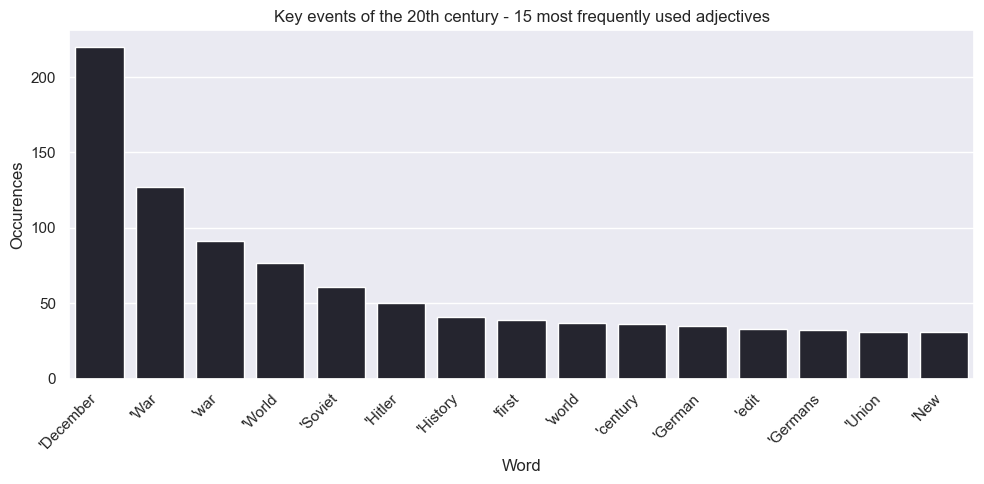

In [48]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    ax = sns.barplot(x="Word", y="Occurences", saturation=0.9, data=top15_nouns)
    ax.set_title("Key events of the 20th century - 15 most frequently used adjectives")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Verbs

In [50]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_verbs = y.nlargest(15, 'Occurences')

In [51]:
top15_verbs

,Word,Occurences
27,'Retrieved,203
36,'United,31
0,'Allied,19
194,'led,15
318,'used,13
192,'launched,12
1,'Archived,10
92,'controlled,9
159,'forced,8
310,'turned,7


/var/folders/wq/ldp_xl896md_q470mj20dqd00000gn/T/ipykernel_82729/1296482226.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


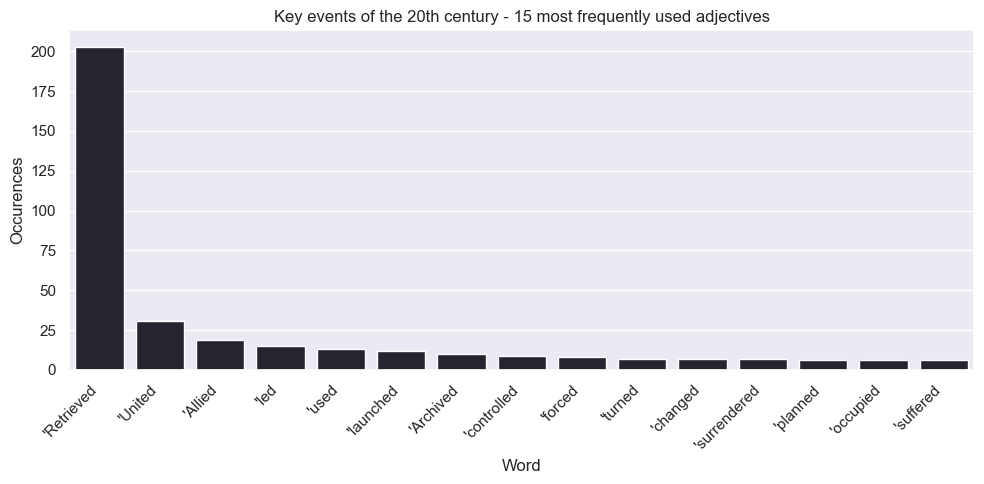

In [52]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    ax = sns.barplot(x="Word", y="Occurences", saturation=0.9, data=top15_verbs)
    ax.set_title("Key events of the 20th century - 15 most frequently used adjectives")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Adjectives

In [54]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15_adj = y.nlargest(15, 'Occurences')

/var/folders/wq/ldp_xl896md_q470mj20dqd00000gn/T/ipykernel_82729/2912818970.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


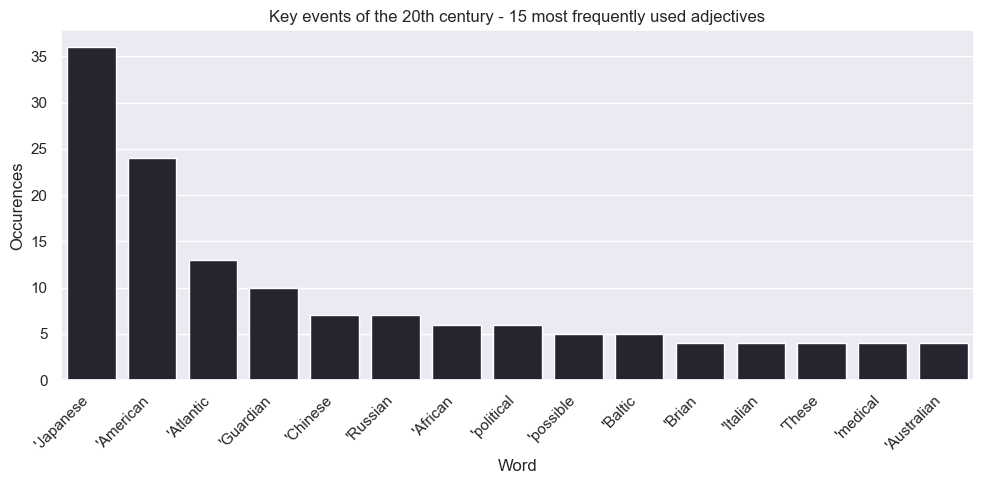

In [55]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    ax = sns.barplot(x="Word", y="Occurences", saturation=0.9, data=top15_adj)
    ax.set_title("Key events of the 20th century - 15 most frequently used adjectives")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### Most of the nouns, verbs, and adjectives can easily be tied to the major players, actions, and descriptions of war throughout the 20th century. Humans just couldn't seem to get along. What a shame. Somebody named Brian, seemed to have been mentioned a lot. I can't think of who that might be. Probably an author or some authors of books in the references section, I would guess.

## Counting country occurences

In [58]:
# Combine filtered list into a single string
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events centuryToggle Historic events century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsKey 

In [59]:
# Define alias map with regex patterns for exact, capitalized matches
alias_map = {
    r'\bUK\b': 'United_Kingdom',
    r'\bBritain\b': 'United_Kingdom',
    r'\bGreat Britain\b': 'United_Kingdom',
    r'\bUS\b': 'United_States',
    r'\bUSA\b': 'United_States',
    r'\bAmerica\b': 'United_States'
}

In [60]:
# Replace aliases with canonical names in the text
for pattern, canonical in alias_map.items():
    listToStr = re.sub(pattern, canonical, listToStr)

In [61]:
# Remove punctuation, split the string into words, and count them.

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [62]:
all_counts

Counter({'December': 220,
         'Retrieved': 203,
         'War': 127,
         'war': 91,
         'World': 77,
         'Soviet': 61,
         'Hitler': 50,
         'Germany': 42,
         'History': 41,
         'first': 39,
         'world': 37,
         'century': 36,
         'Japanese': 36,
         'German': 35,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 31,
         'II': 30,
         'S': 30,
         'ISSN': 30,
         'also': 29,
         'September': 29,
         'Europe': 28,
         'July': 28,
         'became': 28,
         'A': 27,
         'end': 26,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'August': 25,
         'June': 25,
         'Battle': 25,
         'American': 24,
         'October': 24,
         'com': 24,
         'history': 23,
         'new': 23,
         'attack': 23,
         'weapons': 23,
         'This': 22,
         'Africa': 

In [63]:
# Load CSV file containing country names
countries = pd.read_csv("countries.csv", header = None, names=['Country'])

In [64]:
countries.head()

,Country
0,Country
1,Page
2,sovereign states
3,Afghanistan
4,Albania


In [65]:
# Keep the original country names as aliases
countries['country_alias'] = countries['Country']

In [66]:
# Get the unique canonical country names from the CSV
country_list = countries['Country'].unique()

In [67]:
# Build dictionary of counts using canonical names
dict_of_counts = {
    country: all_counts.get(country.replace(" ", "_"), 0)
    for country in country_list
}

In [68]:
print(dict_of_counts)

{'Country': 1, 'Page': 0, 'sovereign states': 0, 'Afghanistan': 1, 'Albania': 2, 'Algeria': 1, 'Andorra': 0, 'Angola': 1, 'Antigua and Barbuda': 0, 'Argentina': 0, 'Armenia': 0, 'Australia': 2, 'Austria': 5, 'Azerbaijan': 0, 'Bahamas': 0, 'Bahrain': 0, 'Bangladesh': 2, 'Barbados': 0, 'Belarus': 1, 'Belgium': 2, 'Belize': 0, 'Benin': 0, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 0, 'Botswana': 0, 'Brazil': 0, 'Brunei': 0, 'Bulgaria': 1, 'Burkina Faso': 0, 'Burundi': 0, 'Cabo Verde': 0, 'Cambodia': 2, 'Cameroon': 0, 'Canada': 2, 'Central African Republic': 0, 'Chad': 0, 'Chile': 0, 'China': 10, 'Colombia': 0, 'Comoros': 0, 'Congo, Democratic Republic of the': 0, 'Congo, Republic of the': 0, 'Costa Rica': 0, 'Croatia': 0, 'Cuba': 3, 'Cyprus': 0, 'Czech Republic': 0, 'Denmark': 3, 'Djibouti': 0, 'Dominica': 0, 'Dominican Republic': 0, 'East Timor': 0, 'Ecuador': 0, 'Egypt': 2, 'El Salvador': 0, 'Equatorial Guinea': 0, 'Eritrea': 0, 'Estonia': 2, 'Eswatini': 0, 'Ethiopia': 0, 'Fij

In [69]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df_cc = pd.DataFrame(dct)

In [70]:
df_cc

,Country,Page,sovereign states,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,Réunion,Saba,Saint Barthelemy,Saint Martin,Saint Pierre and Miquelon,Sint Maarten,Svalbard and Jan Mayen,Wallis and Futuna,Antarctica,Sovereign Military Order of Malta
0,1,0,0,1,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df_cc = df_cc.transpose().reset_index()

In [72]:
df_cc.dtypes

index    object
0         int64
dtype: object

In [73]:
df_cc

,index,0
0,Country,1
1,Page,0
2,sovereign states,0
3,Afghanistan,1
4,Albania,2
...,...,...
288,Sint Maarten,0
289,Svalbard and Jan Mayen,0
290,Wallis and Futuna,0
291,Antarctica,0


In [74]:
df_cc.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [75]:
df_cc

,Country,Times mentioned
0,Country,1
1,Page,0
2,sovereign states,0
3,Afghanistan,1
4,Albania,2
...,...,...
288,Sint Maarten,0
289,Svalbard and Jan Mayen,0
290,Wallis and Futuna,0
291,Antarctica,0


In [76]:
# Set option to display all rows
pd.set_option('display.max_rows', None)

In [141]:
print(df_cc)

                                          Country  Times mentioned
0                                         Country                1
1                                            Page                0
2                                sovereign states                0
3                                     Afghanistan                1
4                                         Albania                2
5                                         Algeria                1
6                                         Andorra                0
7                                          Angola                1
8                             Antigua and Barbuda                0
9                                       Argentina                0
10                                        Armenia                0
11                                      Australia                2
12                                        Austria                5
13                                     Azerbaijan             

In [144]:
df_cc.shape

(293, 2)

In [146]:
top20_countries = df_cc.nlargest(20, 'Times mentioned')

/var/folders/wq/ldp_xl896md_q470mj20dqd00000gn/T/ipykernel_82729/3076936948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Times mentioned', data=top20_countries, palette='viridis')


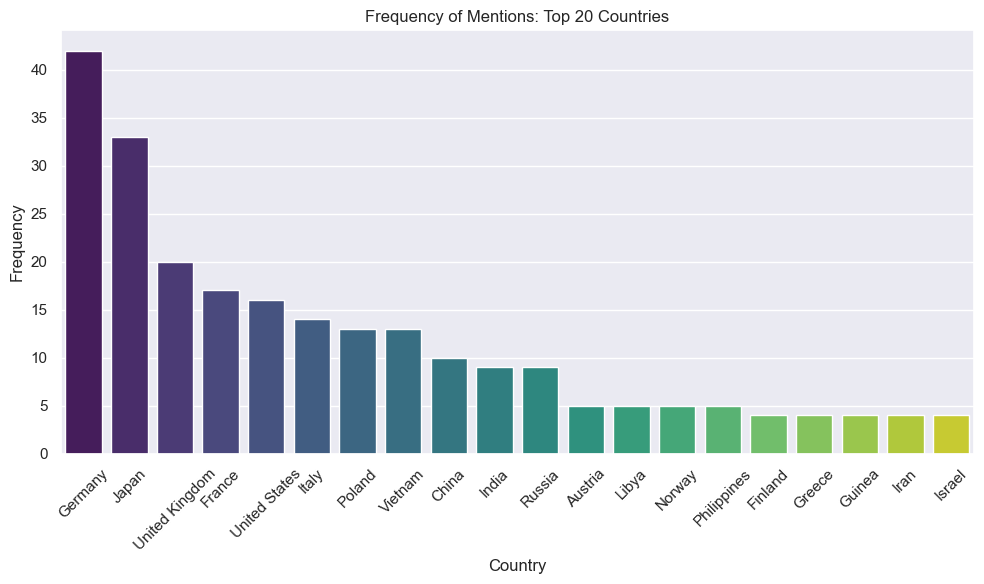

In [148]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Times mentioned', data=top20_countries, palette='viridis')
plt.title('Frequency of Mentions: Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### The main problem I have with this is the lack of the Soviet Union in the countries list. It was clear in the Stop Words section, that Soviet was one of the most used words. The counts of United Kingdom and United States may not be accurate either. This is likely due to the code I used. In this (Counting country occurences) section. Otherwise, as previously mentioned the countries most involved in the largest wars of the 20th century are unsurprisingly those most mentioned in the text. 